# Student Stress Level

In [1]:
import pandas as pd
df=pd.read_csv('student_depression_dataset(in).csv')

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import plot_tree

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27816 non-null  float64
 1   Gender                                 27816 non-null  object 
 2   Age                                    27775 non-null  float64
 3   City                                   27728 non-null  object 
 4   Profession                             27775 non-null  object 
 5   Academic Pressure                      27775 non-null  float64
 6   Work Pressure                          27733 non-null  float64
 7   CGPA                                   27733 non-null  float64
 8   Study Satisfaction                     27733 non-null  float64
 9   Job Satisfaction                       27733 non-null  float64
 10  Sleep Duration                         27698 non-null  object 
 11  Di

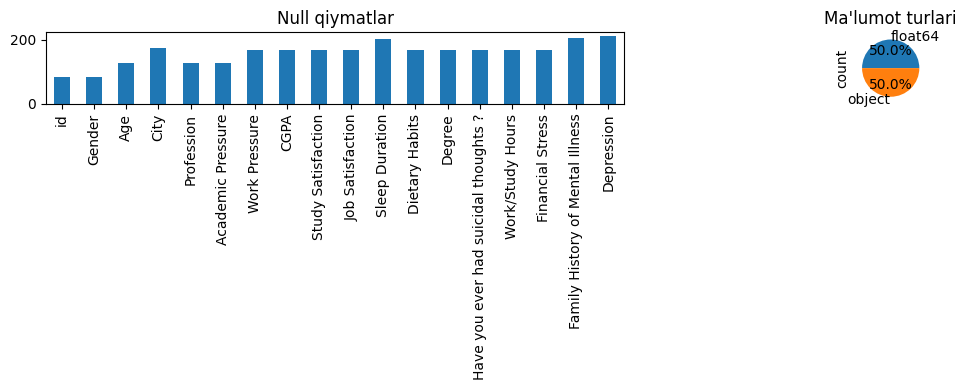

In [6]:
# Grafik
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Null qiymatlar soni
df.isnull().sum().plot(kind='bar', ax=ax[0], title='Null qiymatlar')

# Ma’lumot turlari (dtype)
df.dtypes.astype(str).value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', title='Ma\'lumot turlari')

plt.tight_layout()
plt.show()

In [7]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2.0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1,No,1.0
1,8.0,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2,Yes,0.0
2,26.0,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1,Yes,0.0
3,30.0,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5,Yes,1.0
4,32.0,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1,No,0.0


# Feature Engineering

In [3]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27816 non-null  object 
 1   Age                                    27775 non-null  float64
 2   City                                   27728 non-null  object 
 3   Profession                             27775 non-null  object 
 4   Academic Pressure                      27775 non-null  float64
 5   Work Pressure                          27733 non-null  float64
 6   CGPA                                   27733 non-null  float64
 7   Study Satisfaction                     27733 non-null  float64
 8   Job Satisfaction                       27733 non-null  float64
 9   Sleep Duration                         27698 non-null  object 
 10  Dietary Habits                         27733 non-null  object 
 11  De

In [4]:
df['job_strain'] = df['Work Pressure'] - df['Job Satisfaction']
df['study_effectiveness'] = df['CGPA'] * df['Study Satisfaction']

# Ishdagi zoriqish = Ish bosimi - Ishdan qoniqish
# Bu ustun depressiya yoki ish samaradorligi bilan kuchli bog‘liq bo‘lishi mumkin.

# Talim samaradorligi = Ortacha baho × Oqishdan qoniqish
# Bu ustun oqishdagi umumiy muvaffaqiyat darajasini bildiradi.

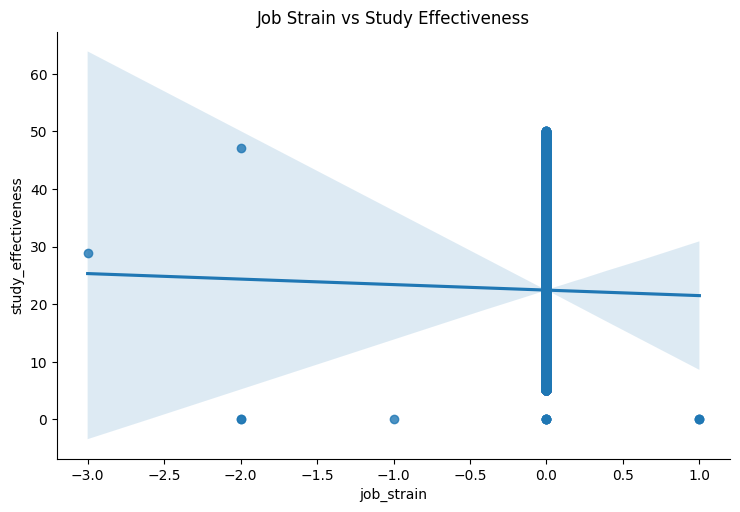

In [11]:
sns.lmplot(data=df, x='job_strain', y='study_effectiveness', height=5, aspect=1.5)
plt.title("Job Strain vs Study Effectiveness")
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27816 non-null  object 
 1   Age                                    27775 non-null  float64
 2   City                                   27728 non-null  object 
 3   Profession                             27775 non-null  object 
 4   Academic Pressure                      27775 non-null  float64
 5   Work Pressure                          27733 non-null  float64
 6   CGPA                                   27733 non-null  float64
 7   Study Satisfaction                     27733 non-null  float64
 8   Job Satisfaction                       27733 non-null  float64
 9   Sleep Duration                         27698 non-null  object 
 10  Dietary Habits                         27733 non-null  object 
 11  De

In [5]:
# missing valuelarni toldiramiz
def tozala(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype=='object':
                df[col].fillna(df[col].mode()[0],inplace=True)
            else:
                df[col].fillna(df[col].mean(),inplace=True)

    return df

In [6]:
tozala(df)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,job_strain,study_effectiveness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1,No,1.0,0.0,17.94
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2,Yes,0.0,0.0,29.50
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1,Yes,0.0,0.0,35.15
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5,Yes,1.0,0.0,11.18
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1,No,0.0,0.0,24.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1,Yes,0.0,0.0,28.75
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3,Yes,0.0,0.0,28.20
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2,No,0.0,0.0,26.44
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5,No,1.0,0.0,13.76


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [16]:
# df.info() ma'lumotlarini ajratib olish
df_info = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes.astype(str).values
})

# Har bir ustunda nechta qiymat borligini qo‘shamiz
df_info['count'] = len(df)  # Hamma ustunda 27901 bo‘ladi

# Grafik
fig = px.bar(
    df_info,
    x='column',
    y='count',
    color='dtype',
    title='DataFrame ustunlari: qiymatlar soni va malumot turi',
    labels={'count': 'Qiymatlar soni'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [7]:
# Encoding qilamiz
def encodlash(df):
    df = df.copy()
    label= LabelEncoder()
    
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] =label.fit_transform(df[col].astype(str))
    return df


In [8]:
df=encodlash(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int32  
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  int32  
 3   Profession                             27901 non-null  int32  
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  int32  
 10  Dietary Habits                         27901 non-null  int32  
 11  De

In [9]:
df['Depression'] = df['Depression'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int32  
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  int32  
 3   Profession                             27901 non-null  int32  
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  int32  
 10  Dietary Habits                         27901 non-null  int32  
 11  De

In [33]:
# Endi Scaling qilamiz
standart=StandardScaler()
num_col=df.select_dtypes(include=['number']).columns.drop('Depression')

In [34]:
num_col

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'job_strain',
       'study_effectiveness'],
      dtype='object')

In [35]:
df[num_col]=standart.fit_transform(df[num_col])

In [36]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,job_strain,study_effectiveness
0,0.889088,1.466181,1.540949,0.02642,1.348108,-0.009836,0.896352,-0.695722,-0.015433,-1.429935,-1.188884,-0.588638,0.757638,-1.124968,-1.493855,-0.961978,1,0.008433,-0.401795
1,-1.124749,-0.372632,-1.434496,0.02642,-0.828514,-0.009836,-1.197983,1.515678,-0.015433,-1.429935,-0.383625,0.252254,-1.319891,-1.124968,-0.799639,1.039525,0,0.008433,0.628173
2,0.889088,1.057556,1.088164,0.02642,-0.102973,-0.009836,-0.427104,1.515678,-0.015433,0.457188,-1.188884,-0.348383,-1.319891,0.498247,-1.493855,1.039525,0,0.008433,1.131574
3,-1.124749,0.444618,1.411582,0.02642,-0.102973,-0.009836,-1.409463,-0.695722,-0.015433,-0.486373,-0.383625,-0.108128,0.757638,-0.854432,1.283010,1.039525,1,0.008433,-1.004095
4,-1.124749,-0.168320,-0.593610,0.02642,0.622567,-0.009836,0.323309,0.041411,-0.015433,-1.429935,-0.383625,0.973019,0.757638,-1.666040,-1.493855,-0.961978,0,0.008433,0.172884


# Logistic Regression

In [24]:
x=df.drop('Depression',axis=1)

In [38]:
x

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,job_strain,study_effectiveness
0,0.889088,1.466181,1.540949,0.02642,1.348108,-0.009836,0.896352,-0.695722,-0.015433,-1.429935,-1.188884,-0.588638,0.757638,-1.124968,-1.493855,-0.961978,0.008433,-0.401795
1,-1.124749,-0.372632,-1.434496,0.02642,-0.828514,-0.009836,-1.197983,1.515678,-0.015433,-1.429935,-0.383625,0.252254,-1.319891,-1.124968,-0.799639,1.039525,0.008433,0.628173
2,0.889088,1.057556,1.088164,0.02642,-0.102973,-0.009836,-0.427104,1.515678,-0.015433,0.457188,-1.188884,-0.348383,-1.319891,0.498247,-1.493855,1.039525,0.008433,1.131574
3,-1.124749,0.444618,1.411582,0.02642,-0.102973,-0.009836,-1.409463,-0.695722,-0.015433,-0.486373,-0.383625,-0.108128,0.757638,-0.854432,1.283010,1.039525,0.008433,-1.004095
4,-1.124749,-0.168320,-0.593610,0.02642,0.622567,-0.009836,0.323309,0.041411,-0.015433,-1.429935,-0.383625,0.973019,0.757638,-1.666040,-1.493855,-0.961978,0.008433,0.172884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,-1.124749,0.240305,1.152848,0.02642,1.348108,-0.009836,-1.300312,1.515678,-0.015433,-1.429935,1.226894,-1.069148,0.757638,-0.042825,-1.493855,1.039525,0.008433,0.561350
27897,0.889088,0.240305,-0.140824,0.02642,-0.828514,-0.009836,1.189696,0.041411,-0.015433,0.457188,-1.188884,1.934038,-1.319891,-1.936576,-0.105423,1.039525,0.008433,0.512346
27898,0.889088,1.057556,-1.046395,0.02642,-0.102973,-0.009836,-0.713625,0.778545,-0.015433,-1.429935,1.226894,1.573656,-1.319891,1.309855,-0.799639,-0.961978,0.008433,0.355534
27899,-1.124749,-1.598508,-0.140824,0.02642,1.348108,-0.009836,-0.529433,-0.695722,-0.015433,0.457188,-1.188884,-1.069148,0.757638,0.768783,1.283010,-0.961978,0.008433,-0.774223


In [25]:
y=df['Depression']

In [40]:
y

0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27901, dtype: int32

In [26]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [42]:
data_sizes = pd.DataFrame({
    'Dataset': ['Train', 'Validation', 'Test'],
    'Samples': [len(x_train), len(x_val), len(x_test)]
})

fig = px.bar(data_sizes, x='Dataset', y='Samples', color='Dataset',
             title='Train / Validation / Test bo‘linmasi',
             text='Samples')

fig.update_layout(showlegend=False)
fig.show()

In [43]:
log_model=LogisticRegression()

In [44]:
log_model

LogisticRegression()

In [45]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=log_model.predict(x_test)

In [47]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [48]:
score=accuracy_score(y_test,y_pred)

In [49]:
print(f"Logistic Regression aniqligi:{score*100}%ga teng")

Logistic Regression aniqligi:83.01075268817203%ga teng


In [58]:
# Hyperparametr Tuning bilan
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

In [59]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [60]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [61]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [62]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.8404359709947794


# Linear Regression

In [66]:
# Linear Regression Classification uchun mos emas lekin tajriba uchun accuracyni topib koramiz
linear_model=LinearRegression()

In [67]:
linear_model

LinearRegression()

In [68]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred=linear_model.predict(x_test)

In [70]:
y_pred

array([0.41190627, 1.01946694, 0.87666566, ..., 0.88983507, 0.91404029,
       0.54632196])

In [71]:
score1=accuracy_score(y_test,y_pred)
# bu yerda y_pred da continius qiymatlar chiqyapti.sababi bu model Regression uchun mos

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [72]:
# 3. Threshold bilan 0 yoki 1 ga o‘tkazish
y_pred_binary = (y_pred >= 0.5).astype(int)

In [73]:
# 4. Accuracy hisoblash
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.828673835125448


In [77]:
# Hyperparametr tuning bilan
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1]
}

In [78]:
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5)

In [79]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1],
                         'positive': [True, False]})

In [80]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [81]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.4945184402696118


# Decision Tree

In [13]:
# Tepadan missing valuelarni toldiramiz,encoding qilamiz
# Decision Treega scaling kerakmasligi uchun scaling qilmaymiz
dt_model=DecisionTreeClassifier(max_depth=3,criterion='gini')

In [14]:
dt_model

DecisionTreeClassifier(max_depth=3)

In [15]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
y_pred=dt_model.predict(x_test)

In [17]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [18]:
score2=accuracy_score(y_test,y_pred)

In [19]:
print(f"Decision Tree aniqligi:{score2*100}%ga teng")

Decision Tree aniqligi:81.11111111111111%ga teng


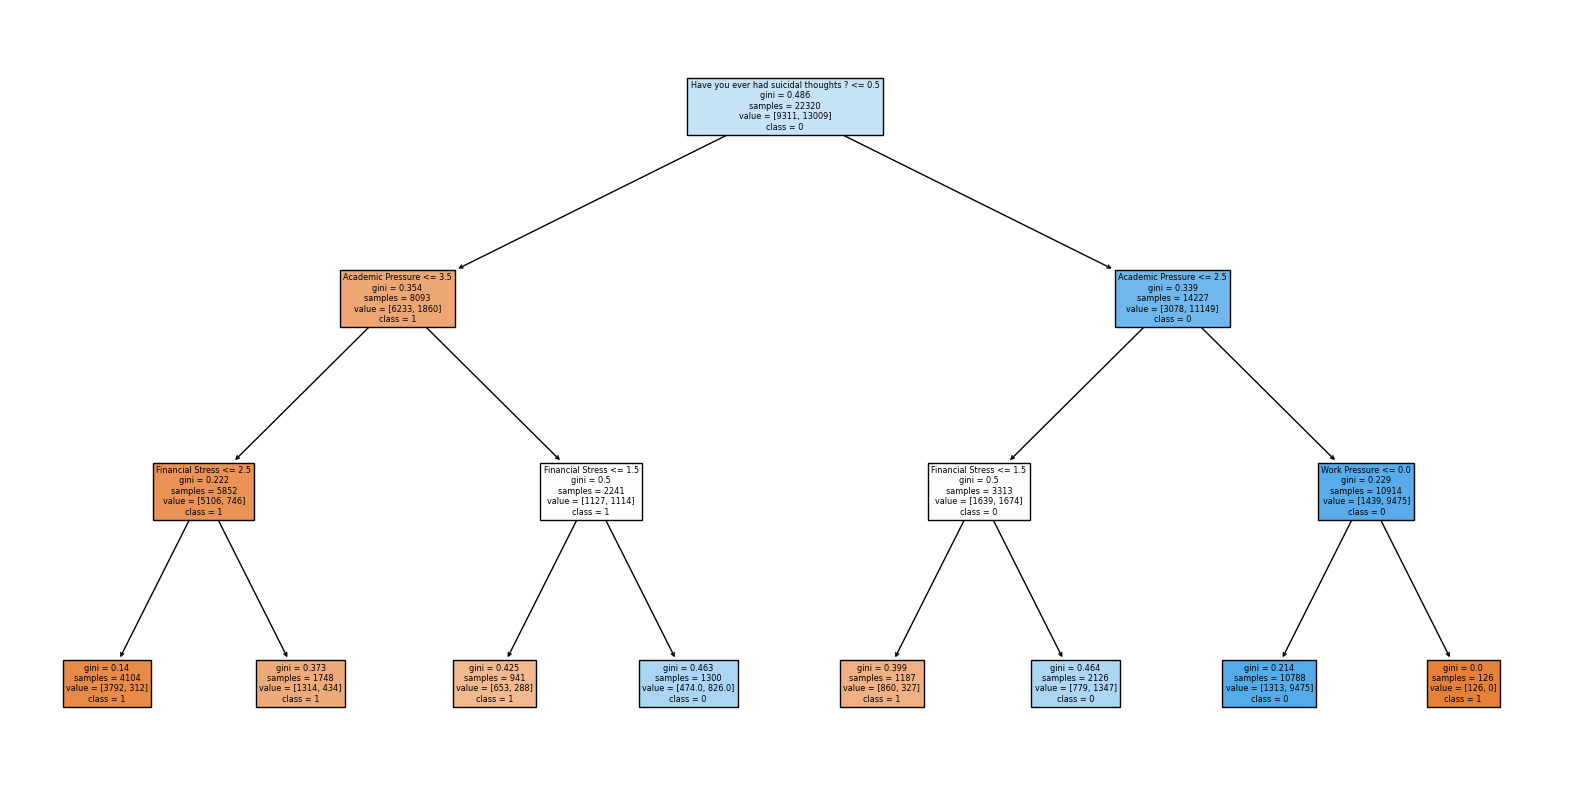

In [21]:
plt.figure(figsize=(20,10))      
plot_tree(dt_model,feature_names=x.columns,class_names=['1','0'],filled=True)
plt.show()


# plot_tree — bu beshta asosiy gradient boosting kutubxonalari (masalan, XGBoost, LightGBM) ichidagi bitta qaror daraxtini (decision tree)
# vizual tarzda chizib ko‘rsatish uchun ishlatiladigan funksiyadir.


# plot_tree nima ko‘rsatadi?
# Har bir tugun (node) — qanday feature bo‘yicha bo‘lingani.

# Har bir barg (leaf) — qanday qiymatga qaror qilinganini.

# Daraxtning chuqurligi va tuzilmasi.

# Mahsulot qaysi shartlar asosida qaysi bargga tushishini.

# Qachon ishlatiladi?
# Modelni tushunish uchun.

# Overfitting bormi-yo‘qmi, vizual baholash uchun.

# Interpretatsiya yoki prezentatsiyalar uchun.

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

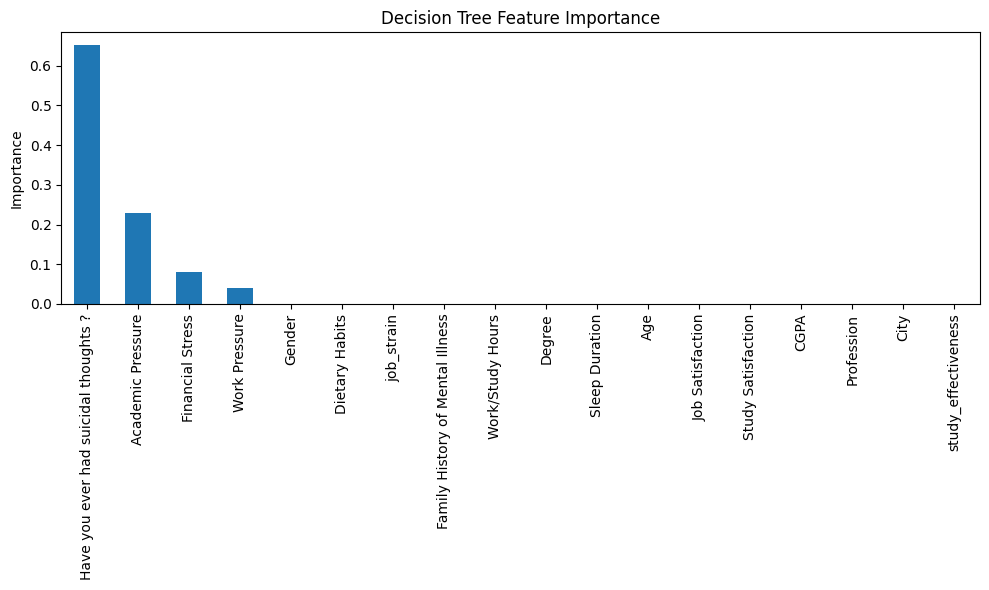

In [ ]:
feature_importances =dt_model.feature_importances_
features = x_train.columns

# Pandas bilan tartiblab olish (ixtiyoriy)
fi = pd.Series(feature_importances, index=features)
fi = fi.sort_values(ascending=False)[:18]  # top 10

# Chizish
plt.figure(figsize=(10, 6))
fi.plot(kind='bar')
plt.title("Decision Tree Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



# feature_importances_ — bu model uchun har bir xususiyatning (feature) muhimligini (ta’sir darajasini) ko‘rsatadigan narsa

In [27]:
# Hyperparametr Tuning bilan
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [28]:
grid_search=GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [29]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [30]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [31]:
best_model=grid_search.best_estimator_

In [32]:
best_model

DecisionTreeClassifier(max_depth=5)

In [33]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.8230529850703135


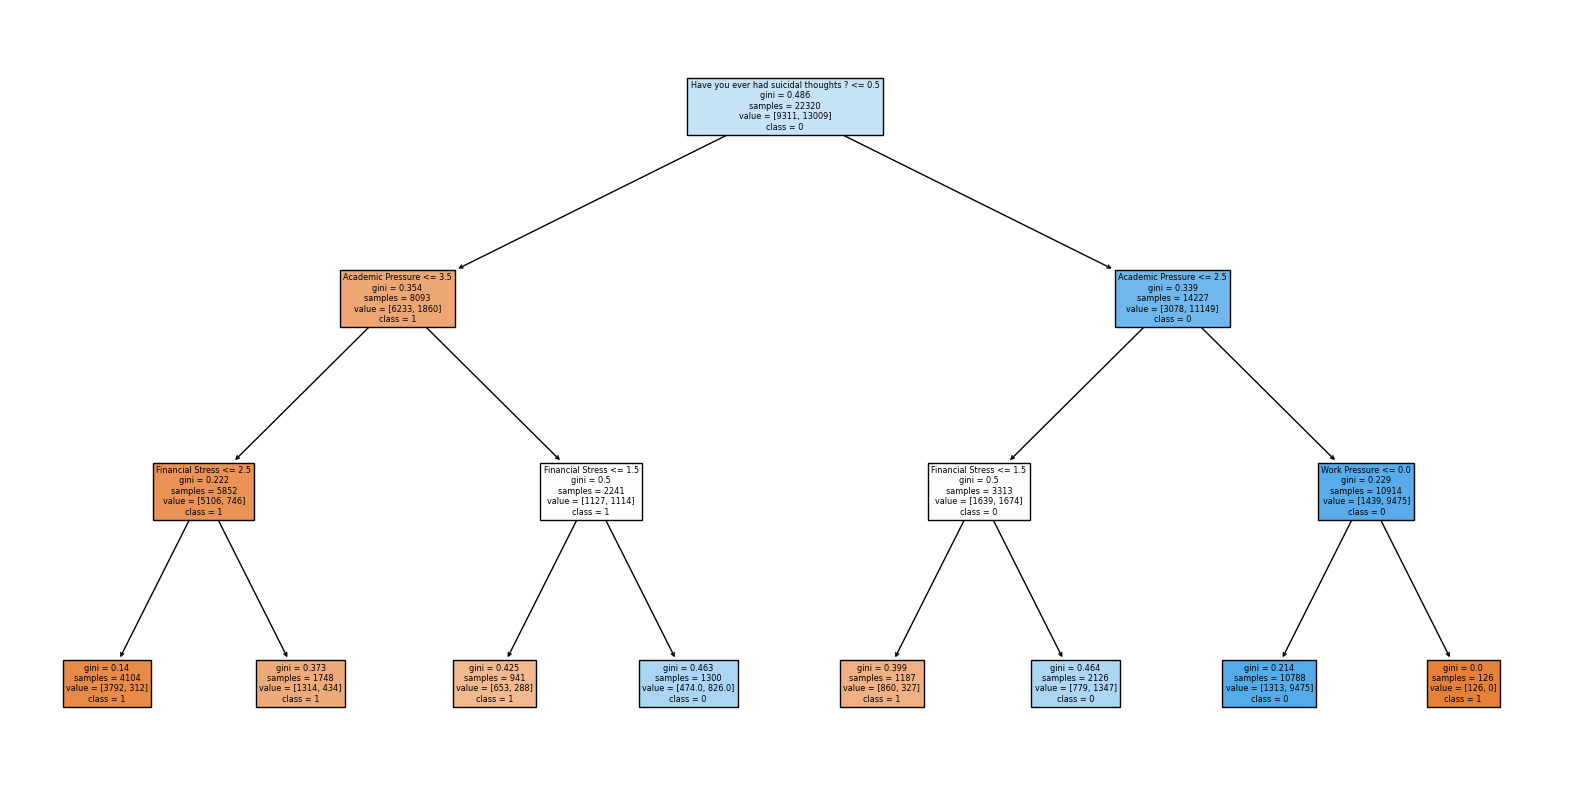

In [34]:
plt.figure(figsize=(20,10))      
plot_tree(dt_model,feature_names=x.columns,class_names=['1','0'],filled=True)
plt.show()

# Random Forest

In [27]:
# Random Forestga Scaling kerak emas.lekin missing value va encoding qilamiz
rf_model=RandomForestClassifier(random_state=42)

In [28]:
rf_model

RandomForestClassifier(random_state=42)

In [29]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred=rf_model.predict(x_test)

In [31]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [32]:
acc3=accuracy_score(y_test,y_pred)

In [33]:
print(f"Random Forest aniqligi:{acc3*100}%ga teng")

Random Forest aniqligi:82.40143369175628%ga teng


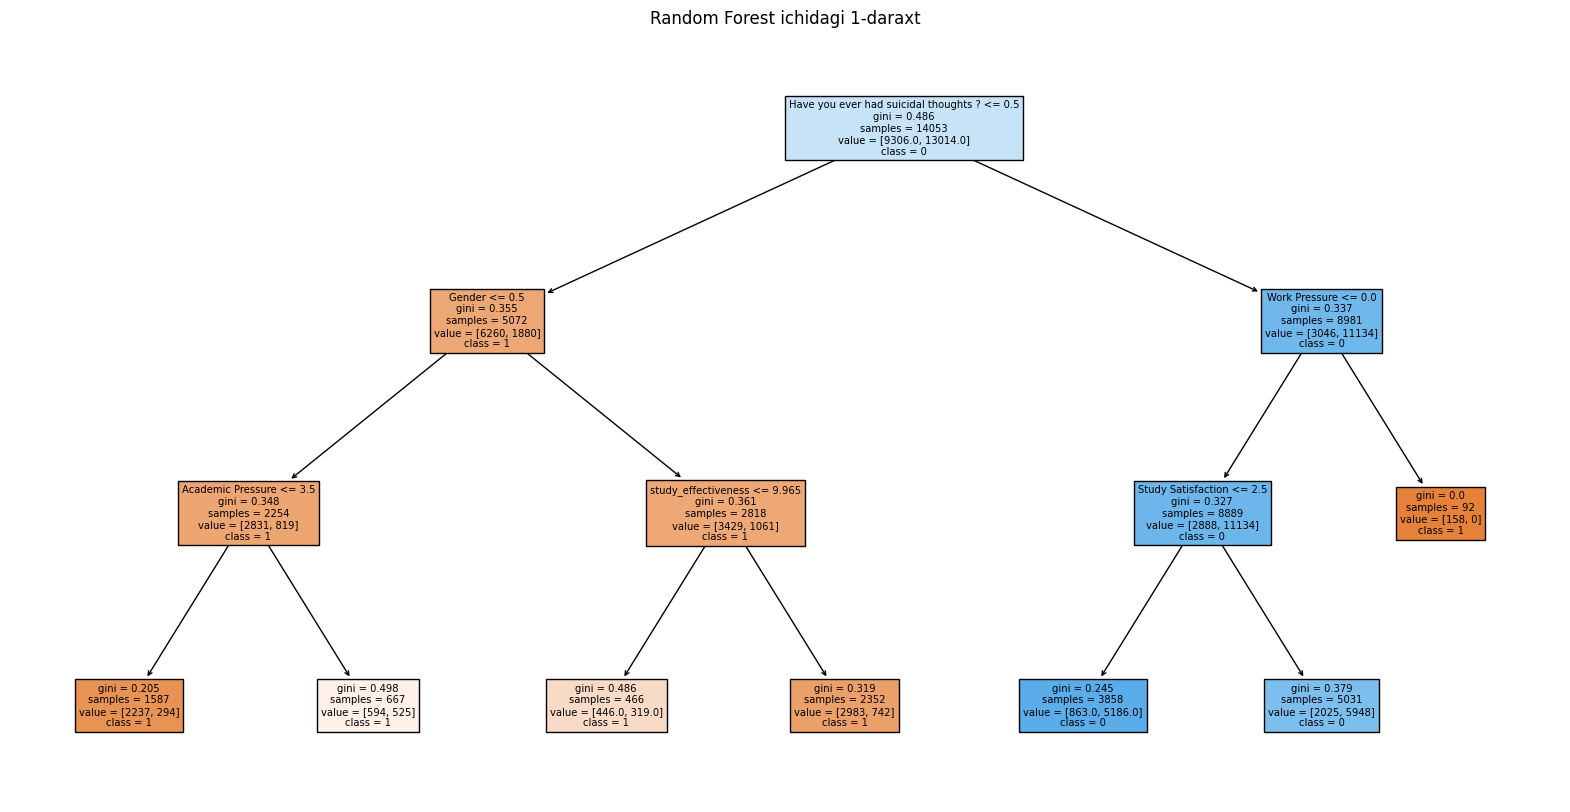

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    rf_model.estimators_[0],  # RandomForest ichidagi 1-daraxt
    feature_names=x.columns,
    class_names=['1', '0'],
    filled=True
)
plt.title("Random Forest ichidagi 1-daraxt")
plt.show()

# rf_model=RandomForestClassifier(max_depth=3,criterion='gini')  - bu chizma shu kod bo'yicha chiqdi
# Random Forest aniqligi:79.71326164874552%ga teng

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

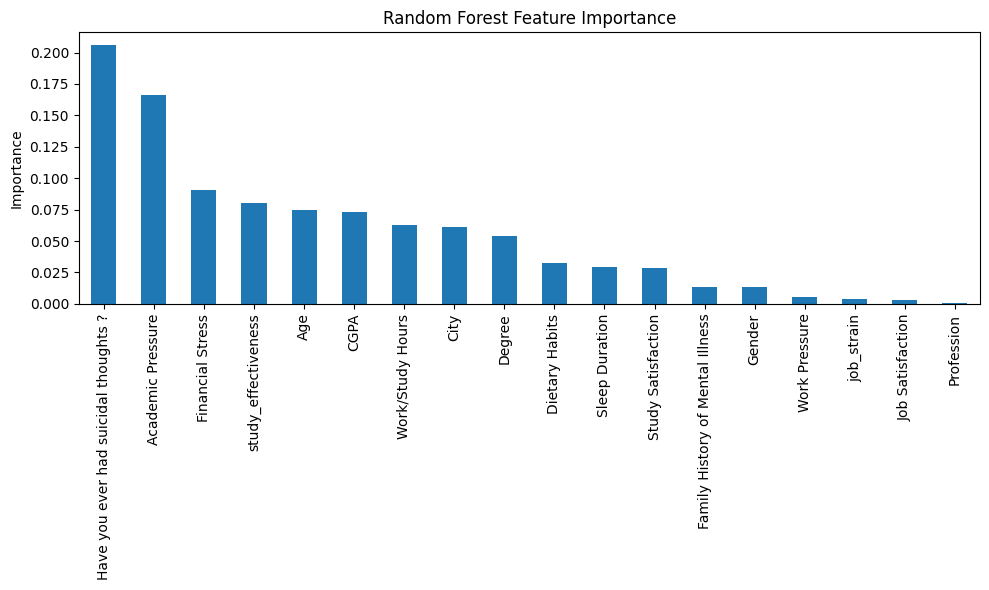

In [36]:
feature_importances =rf_model.feature_importances_
features = x_train.columns

# Pandas orqali top 10 muhim xususiyatlar
fi = pd.Series(feature_importances, index=features)
fi = fi.sort_values(ascending=False)[:18]

# Vizualizatsiya
plt.figure(figsize=(10, 6))
fi.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [32]:
# Hyperparametr Tuning bilan
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [33]:
grid_search=GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [34]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [35]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}


In [36]:
best_model=grid_search.best_estimator_

In [37]:
best_model

RandomForestClassifier(criterion='entropy', min_samples_split=10)

In [38]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.8444143307522515


# LightGBM

In [7]:
df['Depression'] = df['Depression'].astype(int)

In [8]:
# Light GBMda missing value,scaling kerakmas.Lekin natija yaxshi chiqishi uchun missing valuelarni to'ldiramiz.scaling qilmaymiz
# objectni categoryga o'tkazamiz
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  float64 
 2   City                                   27901 non-null  category
 3   Profession                             27901 non-null  category
 4   Academic Pressure                      27901 non-null  float64 
 5   Work Pressure                          27901 non-null  float64 
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  float64 
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  category
 10  Dietary Habits                         27901 non-null  cat

In [12]:
lgb_model=lgb.LGBMClassifier()

In [13]:
lgb_model

LGBMClassifier()

In [14]:
lgb_model.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13009, number of negative: 9311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582841 -> initscore=0.334445
[LightGBM] [Info] Start training from score 0.334445


LGBMClassifier()

In [15]:
y_pred=lgb_model.predict(x_test)

In [16]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [17]:
acc4=accuracy_score(y_test,y_pred)

In [18]:
print(f"LightGBM aniqligi:{acc4*100}%ga teng")

LightGBM aniqligi:82.97491039426524%ga teng


In [19]:
!pip install graphviz


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\xolmu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


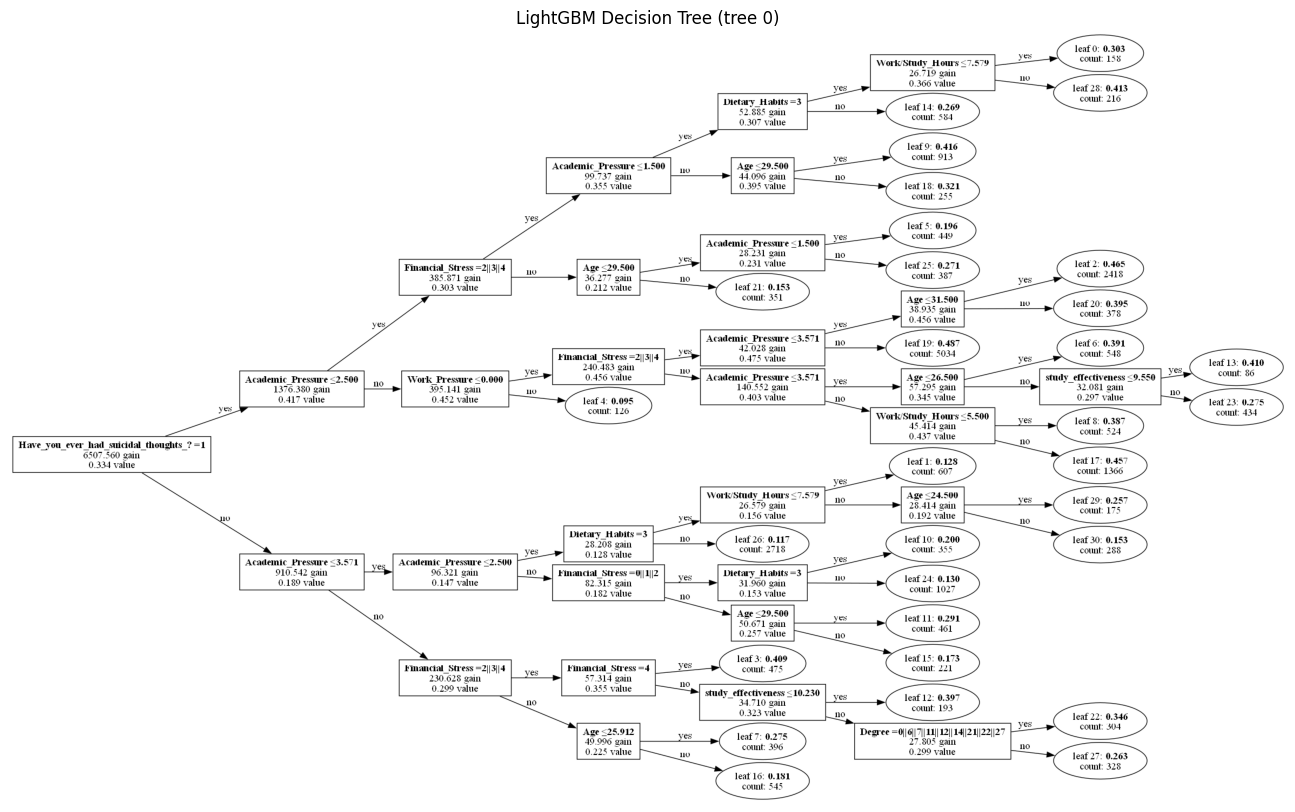

In [ ]:
# plot_tree
lgb.plot_tree(lgb_model, tree_index=0, figsize=(20, 10), show_info=['split_gain', 'internal_value', 'leaf_count'])
plt.title("LightGBM Decision Tree (tree 0)")
plt.show()

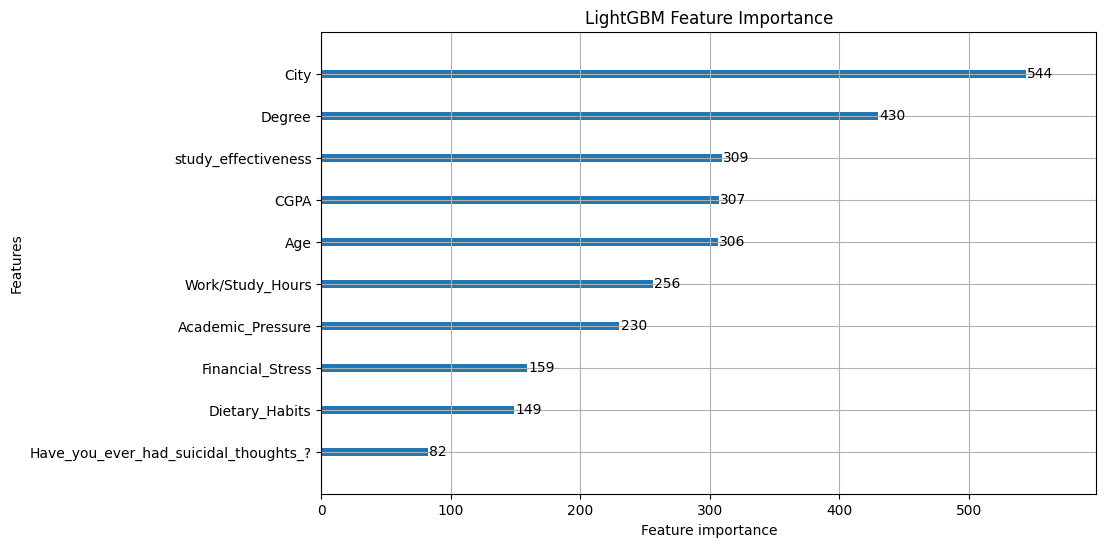

In [ ]:
# plot_importance
lgb.plot_importance(lgb_model.booster_, max_num_features=10, figsize=(10, 6))
plt.title("LightGBM Feature Importance")
plt.show()


# plot_importance() — bu LightGBM yoki XGBoost modelida eng muhim (yani, bashoratga eng kop tasir qiladigan)
# xususiyatlarni (features) grafik tarzda korsatadigan juda foydali funksiyadir.
# max_num_features=10 — eng muhim 10 ta feature ni korsatadi. Istasak koproq son yozishimiz yoki ochirib qoyishimiz mumkin


# plot_importance — bu modeldagi xususiyatlar (features) muhimligini vizual grafik korinishda korsatadigan funksiya.
 # Qayerda ishlatiladi?
# XGBoost (xgb.plot_importance)
# LightGBM (lgb.plot_importance)

 # Nega kerak?
# Modelingiz qaysi xususiyatlarga ko‘proq tayanib qaror chiqarganini tushunish uchun.
# Bu modelni tahlil qilish, xatoliklarni aniqlash, va xususiyat tanlash (feature selection) uchun juda foydali.


# importance_type parametri nimani bildiradi?
# 'weight': qaysi xususiyat daraxtda necha marta ishlatilgan
# 'gain': o‘sha xususiyatdan foydalangan bolib, model nechog‘lik yaxshilangan
# 'cover': ajratishda qatnashgan samplelar soni bo‘yicha



In [28]:
# Hyperparametr Tuning bilan
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [29]:
grid_search=GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [30]:
grid_search.fit(x,y)

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 12979, number of negative: 9341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.581496 -> initscore=0.328919
[LightGBM] [Info] Start training from score 0.328919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [31]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [32]:
best_model=grid_search.best_estimator_

In [33]:
best_model

LGBMClassifier(criterion='gini', max_depth=3, min_samples_split=2)

In [34]:
print("Light GBM Best Score:", grid_search.best_score_)

Light GBM Best Score: 0.8473175565587031


# XGBoost

In [14]:
# XGBoostga encoding kerak lekin missing value,scaling kerakmas.lekin natija yaxshi chiqishi uchun missing valuelarni to'ldiramiz
# encoding qilamiz.scaling qilmaymiz
xgb_model=xgb.XGBClassifier()


In [15]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [16]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_pred=xgb_model.predict(x_test)

In [18]:
acc5=accuracy_score(y_test,y_pred)

In [19]:
print(f"XGBoost aniqligi:{acc5*100}%ga teng")

XGBoost aniqligi:82.68817204301075%ga teng


In [20]:
from xgboost import XGBClassifier, plot_tree
import matplotlib.pyplot as plt

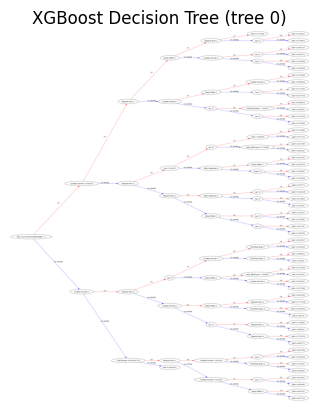

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plot_tree(xgb_model, num_trees=0, rankdir='LR')
plt.title("XGBoost Decision Tree (tree 0)")
plt.figure(figsize=(20, 10))
plt.show()

# Daraxtni chizish (birinchi daraxt: tree_index = 0)
# rankdir='LR' daraxtni gorizontal chizadi
# rankdir='TB' daraxtni vertikal chizadi

# rankdir='LR' — gorizontal (left-right)
# rankdir='TB' — vertikal (top-bottom)

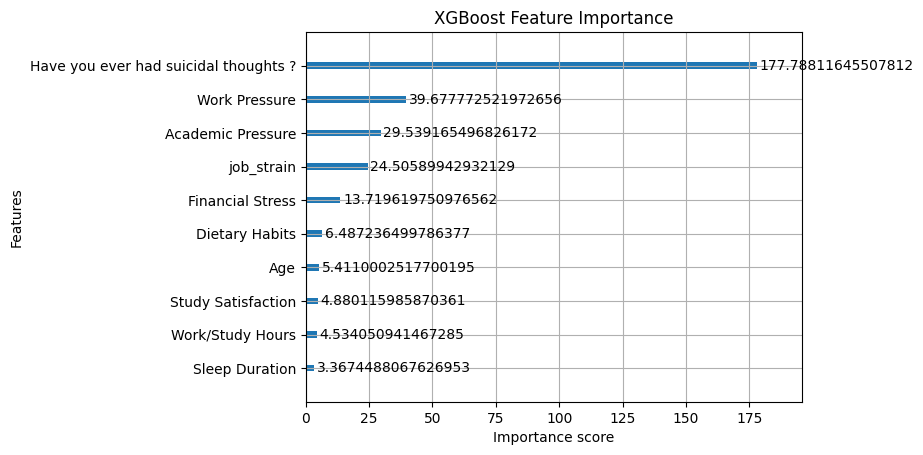

In [ ]:
# plot_importance
# Agar model XGBClassifier/XGBRegressor bo‘lsa:
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("XGBoost Feature Importance")
plt.show()

# importance_type quyidagilardan biri bo'lishi mumkin: 'weight', 'gain', 'cover', 'total_gain', 'total_cover'.

In [40]:
# Hyperparametr Tuning bilan
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [41]:
grid_search=GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [42]:
grid_search.fit(x,y)

C:\Users\xolmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:28:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\xolmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:28:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\xolmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:28:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [43]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [44]:
best_model=grid_search.best_estimator_

In [45]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)

In [46]:
print("XGBoost Best Score:", grid_search.best_score_)

XGBoost Best Score: 0.8466724851791698


# Gradient Boosting Machines(GBM)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [31]:
gbm_model=GradientBoostingClassifier()

In [32]:
gbm_model

GradientBoostingClassifier()

In [33]:
gbm_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [34]:
y_pred=gbm_model.predict(x_test)

In [35]:
acc6=accuracy_score(y_test,y_pred)

In [36]:
print(f"GBM aniqligi:{acc6*100}%ga teng")

GBM aniqligi:83.40501792114695%ga teng


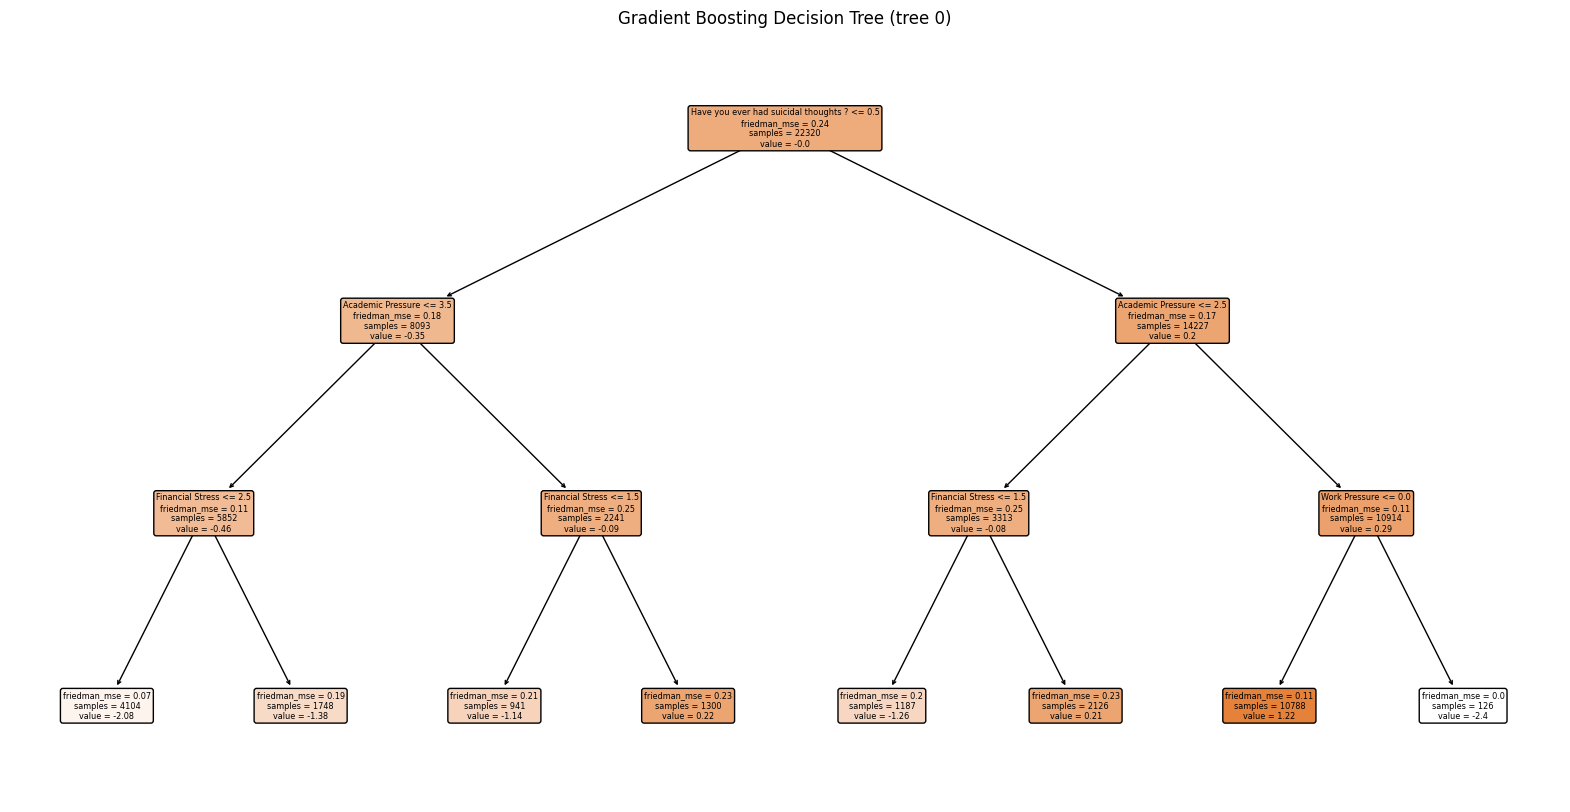

In [38]:
# 0-chi daraxtni chizish (estimator[0] bu birinchi tree)
plt.figure(figsize=(20, 10))
plot_tree(gbm_model.estimators_[0, 0], 
          filled=True, 
          feature_names=x_train.columns, 
          rounded=True, 
          precision=2)
plt.title("Gradient Boosting Decision Tree (tree 0)")
plt.show()


# gbm_model.estimators_[0, 0] — bu birinchi tree (n_estimators=100 bo‘lsa, bu 100 ta kichik daraxtdan birinchisi).

In [43]:
import matplotlib.pyplot as plt
import numpy as np

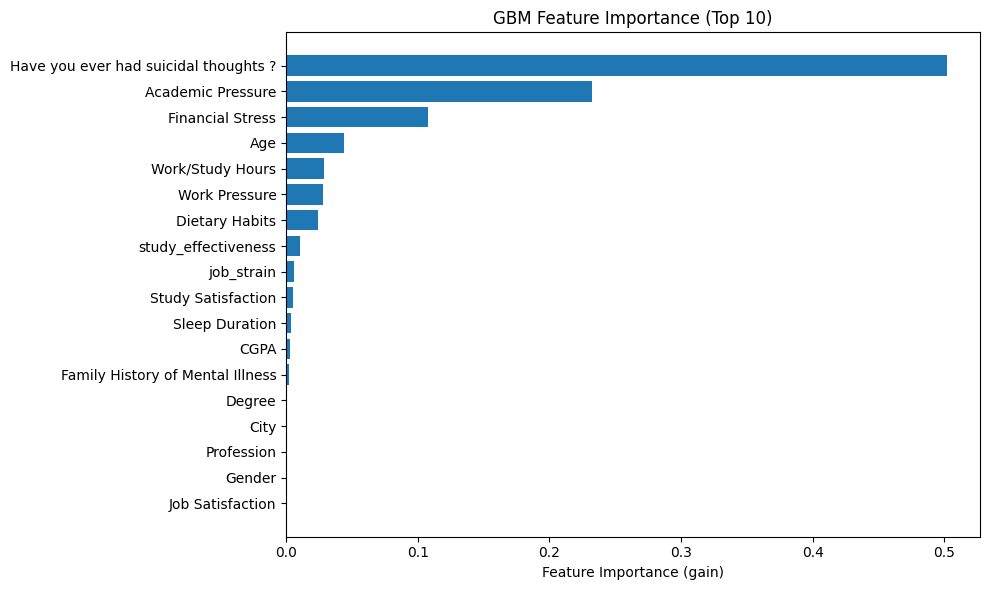

In [45]:
# Feature importance (default: 'gain' ga o'xshash tarzda ishlaydi)
importances = gbm_model.feature_importances_

# Top 10 feature'larni ajratib olish
indices = np.argsort(importances)[-18:]  # eng muhim 10 ta
features = [x_train.columns[i] for i in indices]  # agar X_train bu DataFrame bo‘lsa

# Chizma
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), features)
plt.xlabel("Feature Importance (gain)")
plt.title("GBM Feature Importance (Top 10)")
plt.tight_layout()
plt.show()

In [ ]:
# Hyperparametr Tuning bilan
# Grid Searchda 20 minutgacha ham fitted qilib ulgurmadi shuning uchun Random Searchda qilamiz
param={
    'n_estimators':[10,100,150],
    'max_depth': [3, 5, 10, None],
    'min_samples_split':[2,5,10]
}

In [ ]:
random_search=RandomizedSearchCV(gbm_model,param_distributions=param,n_iter=10,cv=5,random_state=42,n_jobs=-1)
# n_jobs=-1 → barcha protsessor yadro(cores)laridan foydalanadi
# verbose=2   -  Model qayerda ekanini ko‘rib borish(qoshimcha malumot)
# n_iter=10   -  tekshiriladigan kombinatsiyalar soni

In [28]:
random_search

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 150]},
                   random_state=42)

In [29]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 150]},
                   random_state=42)

In [31]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 3}


In [33]:
best_model=random_search.best_estimator_

In [34]:
best_model

GradientBoostingClassifier(min_samples_split=10, n_estimators=150)

In [36]:
print("GBM Best Score:", random_search.best_score_)

GBM Best Score: 0.8496863799283154


# Pycaret Classification

In [1]:
import pandas as pd
df=pd.read_csv('student_depression_dataset(in).csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27816 non-null  float64
 1   Gender                                 27816 non-null  object 
 2   Age                                    27775 non-null  float64
 3   City                                   27728 non-null  object 
 4   Profession                             27775 non-null  object 
 5   Academic Pressure                      27775 non-null  float64
 6   Work Pressure                          27733 non-null  float64
 7   CGPA                                   27733 non-null  float64
 8   Study Satisfaction                     27733 non-null  float64
 9   Job Satisfaction                       27733 non-null  float64
 10  Sleep Duration                         27698 non-null  object 
 11  Di

In [3]:
# Pycaretni import qilish     Classification yoki Regression yoki Clustering     (classlar,funksiyalar,kutubxonalar)
from pycaret.classification import *

In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27816 non-null  object 
 1   Age                                    27775 non-null  float64
 2   City                                   27728 non-null  object 
 3   Profession                             27775 non-null  object 
 4   Academic Pressure                      27775 non-null  float64
 5   Work Pressure                          27733 non-null  float64
 6   CGPA                                   27733 non-null  float64
 7   Study Satisfaction                     27733 non-null  float64
 8   Job Satisfaction                       27733 non-null  float64
 9   Sleep Duration                         27698 non-null  object 
 10  Dietary Habits                         27733 non-null  object 
 11  De

In [6]:
df['job_strain'] = df['Work Pressure'] - df['Job Satisfaction']
df['study_effectiveness'] = df['CGPA'] * df['Study Satisfaction']

# Ishdagi zoriqish = Ish bosimi - Ishdan qoniqish
# Bu ustun depressiya yoki ish samaradorligi bilan kuchli bog‘liq bo‘lishi mumkin.

# Talim samaradorligi = Ortacha baho × Oqishdan qoniqish
# Bu ustun oqishdagi umumiy muvaffaqiyat darajasini bildiradi.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27816 non-null  object 
 1   Age                                    27775 non-null  float64
 2   City                                   27728 non-null  object 
 3   Profession                             27775 non-null  object 
 4   Academic Pressure                      27775 non-null  float64
 5   Work Pressure                          27733 non-null  float64
 6   CGPA                                   27733 non-null  float64
 7   Study Satisfaction                     27733 non-null  float64
 8   Job Satisfaction                       27733 non-null  float64
 9   Sleep Duration                         27698 non-null  object 
 10  Dietary Habits                         27733 non-null  object 
 11  De

In [8]:
# missing valuelarni toldiramiz
def tozala(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype=='object':
                df[col].fillna(df[col].mode()[0],inplace=True)
            else:
                df[col].fillna(df[col].mean(),inplace=True)

    return df

In [9]:
tozala(df)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,job_strain,study_effectiveness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1,No,1.0,0.0,17.94
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2,Yes,0.0,0.0,29.50
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1,Yes,0.0,0.0,35.15
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5,Yes,1.0,0.0,11.18
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1,No,0.0,0.0,24.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1,Yes,0.0,0.0,28.75
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3,Yes,0.0,0.0,28.20
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2,No,0.0,0.0,26.44
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5,No,1.0,0.0,13.76


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [11]:
df['Depression'] = df['Depression'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [13]:
# Setup qilish
# bu cod training jarayonigacha qilib beradi
# Funksional yol(qisqaroq datasetlar uchun,tezroq natija olish uchun ishlatiladi)
# session_id randomli ishlaydi
s=setup(df,target='Depression',session_id=123)

,Description,Value
0,Session id,123
1,Target,Depression
2,Target type,Binary
3,Original data shape,"(27901, 19)"
4,Transformed data shape,"(27901, 43)"
5,Transformed train set shape,"(19530, 43)"
6,Transformed test set shape,"(8371, 43)"
7,Numeric features,9
8,Categorical features,9
9,Preprocess,True


In [14]:
# Setup 2  (OOB - Object Oriented Way)  Katta datasetlarda ishlatiladi
from pycaret.classification import ClassificationExperiment     # bu cod training jarayonigacha qilib beradi
s=ClassificationExperiment()
s.setup(df,target='Depression',session_id=123)

,Description,Value
0,Session id,123
1,Target,Depression
2,Target type,Binary
3,Original data shape,"(27901, 19)"
4,Transformed data shape,"(27901, 43)"
5,Transformed train set shape,"(19530, 43)"
6,Transformed test set shape,"(8371, 43)"
7,Numeric features,9
8,Categorical features,9
9,Preprocess,True


In [15]:
# Modelni Training qilish    'Funksional yol'
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8481,0.9196,0.8870,0.8568,0.8716,0.6857,0.6864,0.2240
gbc,Gradient Boosting Classifier,0.8461,0.9197,0.8877,0.8535,0.8702,0.6813,0.6821,0.4980
lightgbm,Light Gradient Boosting Machine,0.8441,0.9172,0.8803,0.8557,0.8678,0.6779,0.6783,0.3100
lr,Logistic Regression,0.8413,0.9115,0.8829,0.8500,0.8661,0.6714,0.6722,0.6430
ridge,Ridge Classifier,0.8391,0.9107,0.8872,0.8441,0.8651,0.6660,0.6674,0.0750
lda,Linear Discriminant Analysis,0.8391,0.9106,0.8864,0.8446,0.8650,0.6661,0.6674,0.0870
rf,Random Forest Classifier,0.8383,0.9118,0.8770,0.8498,0.8631,0.6657,0.6662,0.3830
xgboost,Extreme Gradient Boosting,0.8340,0.9063,0.8713,0.8476,0.8592,0.6571,0.6576,0.1360
et,Extra Trees Classifier,0.8310,0.9054,0.8718,0.8431,0.8571,0.6505,0.6512,0.3780
svm,SVM - Linear Kernel,0.8039,0.9038,0.9268,0.7862,0.8472,0.5788,0.6075,0.1860


In [16]:
# Modelni Training qilish    'OOB - Object Oriented Way'
best_model=s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8481,0.9196,0.8870,0.8568,0.8716,0.6857,0.6864,0.2250
gbc,Gradient Boosting Classifier,0.8461,0.9197,0.8877,0.8535,0.8702,0.6813,0.6821,0.4940
lightgbm,Light Gradient Boosting Machine,0.8441,0.9172,0.8803,0.8557,0.8678,0.6779,0.6783,0.3160
lr,Logistic Regression,0.8413,0.9115,0.8829,0.8500,0.8661,0.6714,0.6722,0.2380
ridge,Ridge Classifier,0.8391,0.9107,0.8872,0.8441,0.8651,0.6660,0.6674,0.0770
lda,Linear Discriminant Analysis,0.8391,0.9106,0.8864,0.8446,0.8650,0.6661,0.6674,0.0840
rf,Random Forest Classifier,0.8383,0.9118,0.8770,0.8498,0.8631,0.6657,0.6662,0.3950
xgboost,Extreme Gradient Boosting,0.8340,0.9063,0.8713,0.8476,0.8592,0.6571,0.6576,0.1440
et,Extra Trees Classifier,0.8310,0.9054,0.8718,0.8431,0.8571,0.6505,0.6512,0.3890
svm,SVM - Linear Kernel,0.8039,0.9038,0.9268,0.7862,0.8472,0.5788,0.6075,0.1710


In [17]:
# Hamma modellarni bitta visualisatonga jamlash
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
# OOB (Object Oriented Wayni Visualisationi)
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
# Modelni funksional yol bilan qilinganini pkl qilib saqalsh
save_model(best_model,'Student Depression model classification1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Academic Pressure',
                                              'Work Pressure', 'CGPA',
                                              'Study Satisfaction',
                                              'Job Satisfaction',
                                              'Work/Study Hours', 'job_strain',
                                              'study_effectiveness'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missin...
                                        

In [20]:
# Modelni OOB - Object Oriented Way yoli bilan qilinganini pkl qilib saqlsh
s.save_model(best_model,'Student Depression model classification2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Academic Pressure',
                                              'Work Pressure', 'CGPA',
                                              'Study Satisfaction',
                                              'Job Satisfaction',
                                              'Work/Study Hours', 'job_strain',
                                              'study_effectiveness'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missin...
                                        

In [21]:
# Modelni Load qilish(Funksional yol bilan qilinganini)
load_model=load_model('Student Depression model classification1')

Transformation Pipeline and Model Successfully Loaded


In [22]:
# Modelni Load qilish(OOB - Object Oriented Way yoli bilan qilinganini)
load_model2=s.load_model('Student Depression model classification2')

Transformation Pipeline and Model Successfully Loaded


# Tabulate

In [1]:
from tabulate import tabulate

In [2]:
df = [
    {
        "Modelning chiqgan eng yaxshi natijasi": "LogisticRegression", 
        "accuracy_score": "83.0107%", 
        "Hyperparametr tuning bilan": "0.8404%"
    },
    {
        "Modelning chiqgan eng yaxshi natijasi": "LinearRegression", 
        "accuracy_score":  "0.8286%",
        "Hyperparametr tuning bilan": "0.4945%"
    },

    {
        "Modelning chiqgan eng yaxshi natijasi": "DecisionTree", 
        "accuracy_score": "81.1111%",
        "Hyperparametr tuning bilan": "0.8230%"
    },

    {"Modelning chiqgan eng yaxshi natijasi": "RandomForest", 
        "accuracy_score": "82.4014%",
        "Hyperparametr tuning bilan": "0.8444%"

    },

    {"Modelning chiqgan eng yaxshi natijasi": "LightGBM", 
        "accuracy_score": "82.9749%",
        "Hyperparametr tuning bilan": "0.8473%"

    },

    {"Modelning chiqgan eng yaxshi natijasi": "XGBoost", 
        "accuracy_score": "82.6881%",
        "Hyperparametr tuning bilan": "0.8466%"

    },

    {"Modelning chiqgan eng yaxshi natijasi": "GBM", 
        "accuracy_score": "83.4050%",
        "Hyperparametr tuning bilan": "0.8496%"}
]

print(tabulate(df, headers="keys", tablefmt="grid"))

+-----------------------------------------+------------------+------------------------------+
| Modelning chiqgan eng yaxshi natijasi   | accuracy_score   | Hyperparametr tuning bilan   |
+=========================================+==================+==============================+
| LogisticRegression                      | 83.0107%         | 0.8404%                      |
+-----------------------------------------+------------------+------------------------------+
| LinearRegression                        | 0.8286%          | 0.4945%                      |
+-----------------------------------------+------------------+------------------------------+
| DecisionTree                            | 81.1111%         | 0.8230%                      |
+-----------------------------------------+------------------+------------------------------+
| RandomForest                            | 82.4014%         | 0.8444%                      |
+-----------------------------------------+-----------------